In [1]:
import foolbox
import keras
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.applications.resnet50 import ResNet50, \
    preprocess_input, decode_predictions
from keras.preprocessing.image import load_img, img_to_array

keras.backend.set_learning_phase(0)
kmodel = ResNet50(weights=None)

Using TensorFlow backend.


In [ ]:
## Note: If you are using connected internet you can use this line instead!

#kmodel=ResNet50(weights='imagenet')

In [2]:
fname = os.path.join(os.path.expanduser('~'), 
                     '.keras/models/resnet50_weights_tf_dim_ordering_tf_kernels.h5')

In [3]:
kmodel.load_weights(fname)

('n02124075', 'Egyptian_cat', 0.7329371)
('n02123597', 'Siamese_cat', 0.11301911)
('n02123045', 'tabby', 0.046971872)


(-0.5, 223.5, 223.5, -0.5)

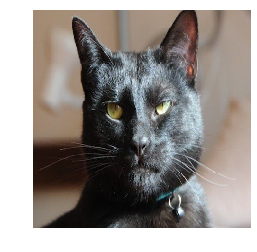

In [4]:
%matplotlib inline

img_path = '../data/img/cat.jpg'
img = load_img(img_path, target_size=(224, 224))

x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = kmodel.predict(x)

for pred in decode_predictions(preds, top=3)[0]:
    print(pred)

plt.imshow(img)
plt.axis('off')

### Your Turn

- Try a few of the other photos in the photo directory!

In [5]:
ls ../data/img

bear.jpg     computer.jpg   house.jpg       shark.jpg      suv.jpg
bicycle.jpg  desk.jpg       itcrowd.jpg     skater.jpg     teacher.jpg
broom.jpg    dolphin.jpg    metro.jpeg      snail.jpg      washing_machine.jpg
bunny.jpg    elevator.jpeg  microscope.jpg  snake.jpg
cat.jpg      globe.jpg      mountain.jpg    stop_sign.jpg
clouds.jpeg  hawk.jpg       README.md       surfing.jpg


('n01484850', 'great_white_shark', 0.85347635)
('n01491361', 'tiger_shark', 0.13022955)
('n01494475', 'hammerhead', 0.012778761)


(-0.5, 223.5, 223.5, -0.5)

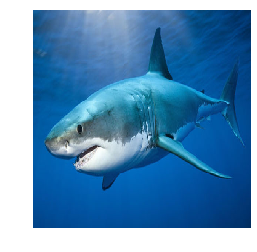

In [7]:
# %load ../solutions/01_shark.py
%matplotlib inline

img_path = '../data/img/shark.jpg'
img = load_img(img_path, target_size=(224, 224))

x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = kmodel.predict(x)

for pred in decode_predictions(preds, top=3)[0]:
    print(pred)

plt.imshow(img)
plt.axis('off')


In [8]:
# initialize foolbox model
preprocessing = (np.array([104, 116, 123]), 1)
fmodel = foolbox.models.KerasModel(kmodel, 
                                   bounds=(0, 255), 
                                   preprocessing=preprocessing)

# get source image and label
example_image, label = foolbox.utils.imagenet_example()

# apply attack on source image
# ::-1 reverses the color channels, 
# because Keras ResNet50 expects BGR instead of RGB
attack = foolbox.attacks.FGSM(fmodel)
adversarial = attack(example_image[:, :, ::-1], label)

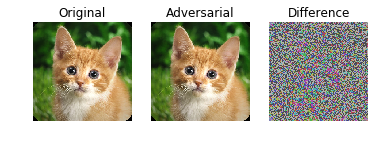

In [9]:
%matplotlib inline

plt.figure()

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(example_image / 255)  
# division by 255 to convert [0, 255] to [0, 1]
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Adversarial')
plt.imshow(adversarial[:, :, ::-1] / 255)  
# ::-1 to convert BGR to RGB
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Difference')
difference = adversarial[:, :, ::-1] - example_image
plt.imshow(difference / abs(difference).max() * 0.2 + 0.5)
plt.axis('off')

plt.show()

## Your Turn

- Did it work? What was the predicted label?

In [11]:
# %load ../solutions/02_adversarial_vs_original_predictions.py
adv_x = np.expand_dims(adversarial.copy()[:, :, ::-1], axis=0)
adv_x = preprocess_input(adv_x)

img_x = np.expand_dims(example_image.copy(), axis=0)
img_x = preprocess_input(img_x)

adv_preds = kmodel.predict(adv_x)
print('Adversarial predictions:')
for pred in decode_predictions(adv_preds, top=3)[0]:
    print(pred)

orig_preds = kmodel.predict(img_x)
print('Original predictions:')
for pred in decode_predictions(orig_preds, top=3)[0]:
    print(pred)


Adversarial predictions:
('n02123045', 'tabby', 0.24158561)
('n02123159', 'tiger_cat', 0.23781295)
('n02127052', 'lynx', 0.11612981)
Original predictions:
('n02123159', 'tiger_cat', 0.36674917)
('n02123045', 'tabby', 0.2520522)
('n02127052', 'lynx', 0.083314255)


## Your Turn

- Now try and make an adversarial attack using a different attack method. See all attacks here: https://foolbox.readthedocs.io/en/latest/modules/attacks.html
- You may also try a targeted class attack: (see: https://foolbox.readthedocs.io/en/latest/modules/criteria.html#foolbox.criteria.TargetClass and classes with labels https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)


In [ ]:
# %load ../solutions/03_deepfool_attack.py

